# Data Science Brazil - Formação Cientista de Dados

## Projeto 4 - Prevendo Customer Churn em Operadoras de Telecom

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

Neste projeto, você deve prever o Customer Churn em uma Operadora de Telecom. Seu trabalho é criar um modelo de aprendizagem de máquina que possa prever se um cliente pode ou não cancelar seu plano e qual a probabilidade de isso ocorrer. O cabeçalho do dataset é uma descrição do tipo de informação em cada coluna.

Para atingir o objetivo do projeto, recomenda-se a criação de um modelo de Regressão Logística, para extrair a informação se um cliente vai cancelar seu plano (Sim ou Não) e a probabilidade de uma opção ou outra.

## 1. Importação dos dados de treino

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Importando dados de treino e visualizando no DataFrame
train = pd.read_csv('projeto4_telecom_treino.csv', index_col=0)
train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
9,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


## 2. Análise Exploratória

In [3]:
# Checagem do formato do dataset
train.shape

(3333, 20)

In [4]:
# Checagem da quantidade de registros para cada classificação da variável Target 
train.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

In [5]:
# Checagem do tipo de cada variável
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
# Checagem se existem registros nulos no dataset
train.isnull().any().any()

False

In [7]:
# Convertendo variáveis com strings para numéricas
train['state_cat'] = train['state'].astype('category').cat.codes
train['area_code_cat'] = train['area_code'].astype('category').cat.codes
train = train.replace('no', 0).replace('yes',1)
train['churn'] = train['churn'].astype('int')
train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_cat,area_code_cat
1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,16,1
2,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,35,1
3,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,31,1
4,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,35,0
5,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,36,1
6,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1,2
7,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,19,2
8,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,24,1
9,LA,117,area_code_408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,18,0
10,WV,141,area_code_415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,49,1


In [8]:
# Manipulação para manter somente colunas numéricas no dataset
col = ['state_cat', 'account_length', 'area_code_cat', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']

train = train[col]

In [9]:
# Análise estatística para verificar se há outliers muito relevantes nas variáveis
train.describe()

,state_cat,account_length,area_code_cat,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,1.000600,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,0.709649,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,0.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,1.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,2.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,2.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


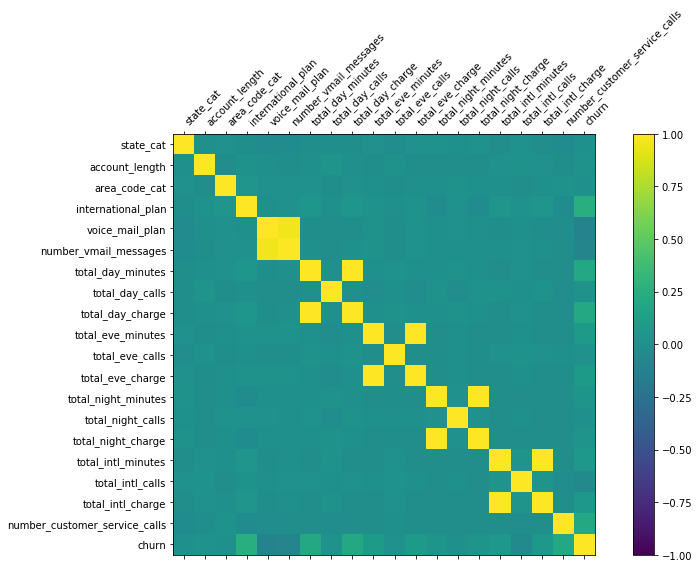

In [10]:
# Matriz de Correlação com nomes das variáveis
correlations = train.corr()

# Plot
import numpy as np
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 20, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns, rotation=45, horizontalalignment='left')
ax.set_yticklabels(train.columns)
fig.tight_layout()
plt.show()

In [11]:
# Explorando correlação entre variáveis preditoras e variável Target 'churn'
train.corr()['churn'].sort_values(ascending=False)

churn                            1.000000
international_plan               0.259852
number_customer_service_calls    0.208750
total_day_minutes                0.205151
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_charge                 0.092786
total_intl_charge                0.068259
total_intl_minutes               0.068239
total_night_charge               0.035496
total_night_minutes              0.035493
total_day_calls                  0.018459
account_length                   0.016541
total_eve_calls                  0.009233
state_cat                        0.007780
total_night_calls                0.006141
area_code_cat                    0.003256
total_intl_calls                -0.052844
number_vmail_messages           -0.089728
voice_mail_plan                 -0.102148
Name: churn, dtype: float64

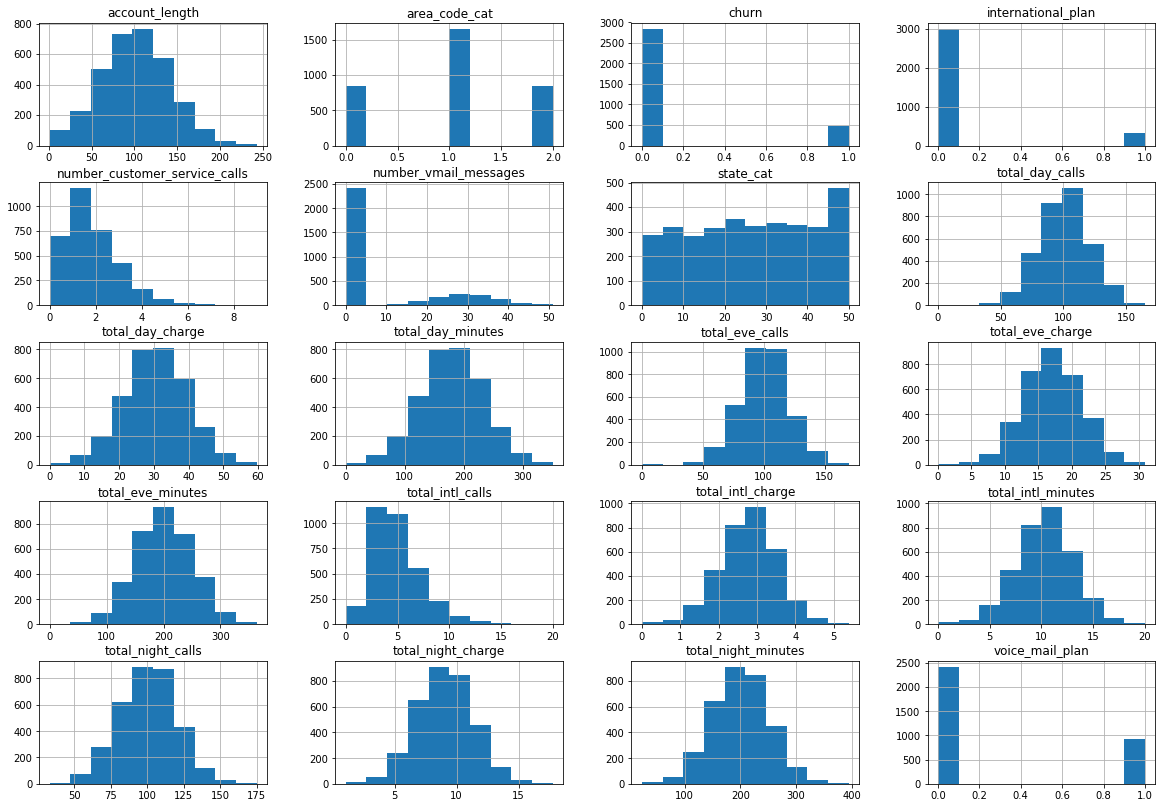

In [12]:
# Checagem da distribuição de cada variável
train.hist(figsize=(20,14));

## 3. Pré Processamento

### 3.1 Importação e manipulação dos dados de teste

In [13]:
# Importando dados de teste e realizando manipulações semelhantes aquelas aplicadas nos dados de treino
test = pd.read_csv('projeto4_telecom_teste.csv', index_col=0)
test['state_cat'] = test['state'].astype('category').cat.codes
test['area_code_cat'] = test['area_code'].astype('category').cat.codes
test = test.replace('no', 0).replace('yes',1)
test['churn'] = test['churn'].astype('int')
test = test[col]

In [14]:
# Conferindo formato dos datasets de treino e de teste
print(train.shape)
print(test.shape)

(3333, 20)
(1667, 20)


### 3.2 Resample

In [15]:
print('Registros com classe not_churn: ', len(train[train.churn==0]))
print('Registros com classe churn: ', len(train[train.churn==1]))

Registros com classe not_churn:  2850
Registros com classe churn:  483


#### A classe dos clientes propensos a virarem churn é muito pequena na amostra, por isso é necessário balanceá-la


In [16]:
# Importando função para aumentar amostra da classe minoritária
from sklearn.utils import resample

# Separando registros por classe
not_churn = train[train.churn==0]
churn = train[train.churn==1]

# Aumentando amostra da classe minoritária
churn_upsampled = resample(churn,
                          replace=True, 
                          n_samples=len(not_churn))

# Reagrupando os registros de ambas as classes
new_train = pd.concat([not_churn, churn_upsampled])

# Checando a contagem para cada uma das classes
new_train.churn.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

### 3.3 Normalização (MinMaxScaler)

In [17]:
# Carregando os dados de treino para normalização
array = new_train.values
X = array[:,0:19]
Y = array[:, 19]

# Carregando os dados de teste para normalização
array_test = test.values
X_test = array_test[:,0:19]

In [18]:
# Normalização dos dados de treino e teste
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX_test = scaler.fit_transform(X_test)

### 3.4 Padronização

In [19]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from sklearn.preprocessing import StandardScaler

# Gerando o novo padrão
scaler = StandardScaler().fit(rescaledX)
standardX = scaler.transform(rescaledX)
scaler_test = StandardScaler().fit(rescaledX_test)
standardX_test = scaler.transform(rescaledX_test)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", rescaledX)
print("\nDados Padronizados: \n\n", standardX)

Dados Originais: 

 [[0.32       0.52479339 0.5        ... 0.15       0.5        0.11111111]
 [0.7        0.43801653 0.5        ... 0.15       0.68518519 0.11111111]
 [0.62       0.56198347 0.5        ... 0.25       0.60925926 0.        ]
 ...
 [1.         0.65289256 0.5        ... 0.15       0.51481481 0.        ]
 [0.         0.72727273 0.5        ... 0.1        0.56481481 0.11111111]
 [0.8        0.85950413 1.         ... 0.25       0.42592593 0.33333333]]

Dados Padronizados: 

 [[-0.6864697   0.66467609 -0.00714163 ... -0.53740355 -0.15315712
  -0.52072939]
 [ 0.62578837  0.13506957 -0.00714163 ... -0.53740355  1.16828203
  -0.52072939]
 [ 0.34952351  0.89165031 -0.00714163 ...  0.26448133  0.62649198
  -1.14038649]
 ...
 [ 1.66178158  1.44647619 -0.00714163 ... -0.53740355 -0.04744198
  -1.14038649]
 [-1.79152913  1.90042463 -0.00714163 ... -0.93834599  0.30934659
  -0.52072939]
 [ 0.97111944  2.70744408  1.39655832 ...  0.26448133 -0.68173277
   0.71858482]]


## 4. Feature Selection

### 4.1 Eliminação Recursiva de Atributos

In [20]:
# Import dos módulos
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 4)
fit = rfe.fit(standardX, Y)

# Print dos resultados
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d \n" % fit.n_features_)
features_col_index = []
index = 0
for i in fit.support_:
    if i == True:
        features_col_index.append(index)
    index += 1
features_col_index
features_col = new_train.columns[features_col_index].values
print('As features escolhidas pela RFE estão nas colunas de posição: \n', features_col_index)
print('\nAs features escolhidas pela RFE foram: \n', features_col)

Ranking dos Atributos: [14 11 13  1  1  2  1 12  3  4 15  6 10 16  8  5  7  9  1]
Número de Melhores Atributos: 4 

As features escolhidas pela RFE estão nas colunas de posição: 
 [3, 4, 6, 18]

As features escolhidas pela RFE foram: 
 ['international_plan' 'voice_mail_plan' 'total_day_minutes'
 'number_customer_service_calls']


## 5. Modelo de Classificação

### 5.1 Regressão Logística

In [21]:
# Selecionando as colunas das variáveis escolhidas para input (já normalizadas) e output de treino
X = standardX[:, features_col_index]
Y = array[:, 19]

# Selecionando dados de teste
X_test = standardX_test[:, features_col_index]
Y_test = array_test[:, 19]

# Criando o modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X, Y)

# Salvando o modelo
import pickle
arquivo = 'projeto4_modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Score do modelo nos dados de teste
result = modelo.score(X_test, Y_test)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Modelo salvo!
Acurácia nos Dados de Teste: 70.186%


In [22]:
# Fazendo as previsões e construindo a Confusion Matrix
from sklearn.metrics import confusion_matrix
previsoes = modelo.predict(X_test)
matrix = confusion_matrix(Y_test, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[983 460]
 [ 37 187]]


In [23]:
# Inserindo no dataset de teste as previsões e as probabilidades do cliente virar churn 
test.insert(20, 'churn_predict', pd.Series(modelo.predict(X_test),index=range(1,len(test)+1), dtype='int64'))
test.insert(21, 'churn_proba', pd.Series(modelo.predict_proba(X_test)[:,1],index=range(1,len(test)+1)))

In [24]:
# Visualizando dataset com resultados
test.head(10)

,state_cat,account_length,area_code_cat,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,churn_predict,churn_proba
1,11,101,2,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0,0.346100
2,26,137,2,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0,0.313332
3,35,103,0,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0,0.491761
4,32,99,1,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0,0.456923
5,40,108,1,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0,1,0.569160
6,12,117,1,0,0,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,0,0,0.487743
7,28,63,1,0,1,32,218.9,124,37.21,214.3,125,18.22,260.3,120,11.71,12.9,3,3.48,1,0,0,0.269017
8,18,94,0,0,0,0,157.5,97,26.78,224.5,112,19.08,310.8,106,13.99,11.1,6,3.00,0,0,0,0.164167
9,24,138,2,0,0,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,0,0,0.249236
10,43,128,1,0,1,43,177.8,100,30.23,147.3,89,12.52,194.2,92,8.74,11.9,1,3.21,0,0,0,0.097764


In [25]:
# Salvando arquivo .csv com resultados 
test.to_csv('projeto4_previsoes_dataset_teste.csv')